In [1]:
import numpy as np
import sys
import time
import h5py as h5
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\hyli\Documents\GitHub\CrystalDiff")

from CrystalDiff import util, pulse, lclsutil, crystal

In [38]:
# ----------------------------------------------------------------------------------------------------------
#                       Step 1: Split 
# ----------------------------------------------------------------------------------------------------------
grating_list = [crystal.SinusoidalPhaseGrating(),
                crystal.SinusoidalPhaseGrating()]

# ----------------------------------------------------------------------------------------------------------
#                       Step 2: Delay
# ----------------------------------------------------------------------------------------------------------

# Some meta data for the delay line.
reflect_num = 4
h_length = 2. * np.pi / (1.9201 * 1e-4)
hlen_vals = np.array([h_length,] * reflect_num)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#                       Crystal for branch  1
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Set up the angles
angle_offset = np.arctan(1e-3) 
delta = 13e-6
bragg_angle = np.radians(18.836) + delta

theta = bragg_angle + np.pi / 2.
theta_vals = np.array([theta, np.pi + theta , - theta , np.pi - theta ]) + angle_offset

rho = bragg_angle - np.pi / 2.
rho_vals = np.array([rho, np.pi + rho, - rho, np.pi - rho]) + angle_offset

tau_vals = np.array([0., np.radians(0.), - np.radians(0.), 0.])

# Set up the surface position
surface_points = [np.zeros(3, dtype=np.float64) for x in range(reflect_num)]

# Initialize the crystals
crystal_list_1 = lclsutil.get_crystal_list(num = reflect_num,
                                                  hlen_vals = hlen_vals,
                                                  rho_vals = rho_vals,
                                                  theta_vals = theta_vals,
                                                  tau_vals = tau_vals,
                                                  surface_points=surface_points,
                                                  chi0=complex(-0.97631E-05, 0.14871E-06),
                                                  chih_sigma=complex(0.59310E-05, -0.14320E-06),
                                                  chihbar_sigma=complex(0.59310E-05, -0.14320E-06),
                                                  chih_pi=complex(0.46945E-05, -0.11201E-06),
                                                  chihbar_pi=complex(0.46945E-05, -0.11201E-06))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#                       Crystal for branch  2
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Set up the angles
angle_offset = - np.arctan(1e-3) 
delta = 13e-6
bragg_angle = np.radians(18.836) + delta

theta = 1.5 * np.pi - bragg_angle
theta_vals = np.array([theta, np.pi + theta , - theta , np.pi - theta ]) + angle_offset

rho = 0.5 * np.pi - bragg_angle
rho_vals = np.array([rho, np.pi + rho, - rho, np.pi - rho]) + angle_offset

tau_vals = np.array([0., np.radians(0.), - np.radians(0.), 0.])

# Set up the surface position
surface_points = [np.zeros(3, dtype=np.float64) for x in range(reflect_num)]

# Initialize the crystals
crystal_list_2 = lclsutil.get_crystal_list(num = reflect_num,
                                                  hlen_vals = hlen_vals,
                                                  rho_vals = rho_vals,
                                                  theta_vals = theta_vals,
                                                  tau_vals = tau_vals,
                                                  surface_points=surface_points,
                                                  chi0=complex(-0.97631E-05, 0.14871E-06),
                                                  chih_sigma=complex(0.59310E-05, -0.14320E-06),
                                                  chihbar_sigma=complex(0.59310E-05, -0.14320E-06),
                                                  chih_pi=complex(0.46945E-05, -0.11201E-06),
                                                  chihbar_pi=complex(0.46945E-05, -0.11201E-06))

# ----------------------------------------------------------------------------------------------------------
#                       Step 3: Pulse 
# ----------------------------------------------------------------------------------------------------------

# Set up the pulse
my_pulse = pulse.GaussianPulse3D()

energy_center = 10.
k_len = util.kev_to_wave_number(energy=energy_center)

my_pulse.polar = np.array([0., 1., 0.], dtype=np.complex128)

my_pulse.k0 = np.array([0., 0., k_len])
my_pulse.n = my_pulse.k0 / util.l2_norm(my_pulse.k0)
my_pulse.omega0 = k_len * util.c

my_pulse.sigma_x = 100.  # sigma_t
my_pulse.sigma_y = 100.  # sigma_t  # fs
my_pulse.sigma_z = 1.  # fs
my_pulse.sigma_mat = np.diag(np.array([my_pulse.sigma_x ** 2,
                                       my_pulse.sigma_y ** 2,
                                       my_pulse.sigma_z ** 2], dtype=np.float64))
my_pulse.sigma_mat *= util.c ** 2

magnitude_peak = 1.
my_pulse.scaling = complex(my_pulse.sigma_x * my_pulse.sigma_y *
                           my_pulse.sigma_z * (util.c ** 3), 0.) * magnitude_peak

pre_length = 1e6
my_pulse.x0 = np.array([0., 0., -pre_length])

# ----------------------------------------------------------------------------------------------------------
#                       Step 4: Arrange the crystals
# ----------------------------------------------------------------------------------------------------------
path_list_1 = [5e6, 5e4, 20e4, 10e4, 10e6, 5e6]
path_list_2 = [5e6, 5e4, 40e4, 20e4, 10e6, 5e6]

(intersect_brunch_1, 
 kout_brunch_1,
 intersect_brunch_2,
 kout_brunch_2) = lclsutil.get_light_path(pulse_obj=my_pulse, 
                                          grating_list=grating_list,
                                          crystal_list_1=crystal_list_1, 
                                          path_list_1=path_list_1, 
                                          crystal_list_2=crystal_list_2, 
                                          path_list_2=path_list_2)

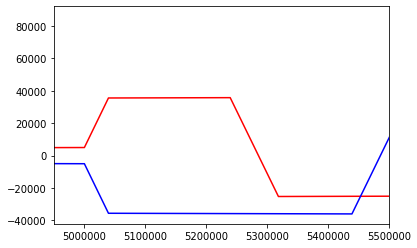

In [39]:
plt.plot(intersect_brunch_1[:,2], intersect_brunch_1[:,1],'r')
plt.plot(intersect_brunch_2[:,2], intersect_brunch_2[:,1],'b')

plt.xlim([5e6-5e4, 5e6 + 5e5])

plt.show()

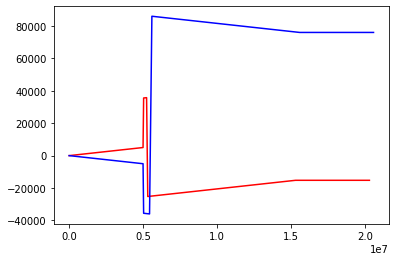

In [40]:
plt.plot(intersect_brunch_1[:,2], intersect_brunch_1[:,1],'r')
plt.plot(intersect_brunch_2[:,2], intersect_brunch_2[:,1],'b')

#plt.xlim([5e6-5e4, 5e6 + 5e5])

plt.show()